<a href="https://colab.research.google.com/github/Ankitabhattarai01/2431167_AnkitaBhattarai_FinalAssignment_AI/blob/main/2431167_AnkitaBhattarai_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assessment
!ls CO2Emissions_Canada.csv

Mounted at /content/drive
/content/drive/MyDrive/Assessment
CO2Emissions_Canada.csv


#Exploratory Data Analysis and Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv("CO2Emissions_Canada.csv")

#(a) When and by whom was the dataset created?

Ans:The dataset "CO2 Emission by Vehicles" was uploaded to Kaggle by Debajyoti Podder. However, the original source and creation date are not explicitly mentioned on Kaggle.

#(b) How did you access the dataset?

Ans:The dataset was accessed from Kaggle, a popular platform for data science and machine learning datasets.I then used the pandas library to import it into a DataFrame pd.read_csv('filename.csv').This allowed me to perform exploratory data analysis and understand the dataset's Structure.


#(c) How does it align with the chosen UNSDG?

Ans:This dataset aligns with UNSDG 13: Climate Action as it focuses on CO2 emission from vehicles, a major contributor to climate change. By analyzing vehical emission and fuel consumption pattern, we can identify factors that influence carbon output and explore ways to promote sustainable transportation. The insights gained can support policies aimed at reducing emission, encouraging fuel-efficient vehicals, and mitigating the environment impact of transportation

#(d) List all the attributes (columns) present in the dataset.

In [5]:
#attributes(columns) of a dataset
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
data = data.map(lambda x: x.strip() if isinstance(x, str) else x)

In [6]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2  

In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int6

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Transform the data column
    label_encoders[col] = le  # Store the encoder for later use



Categorical Columns: Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


In [ ]:
data.fillna(data.median(), inplace=True)
print("Missing values filled using median!")
data.head()

Missing values filled using median!


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [ ]:
print(data.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


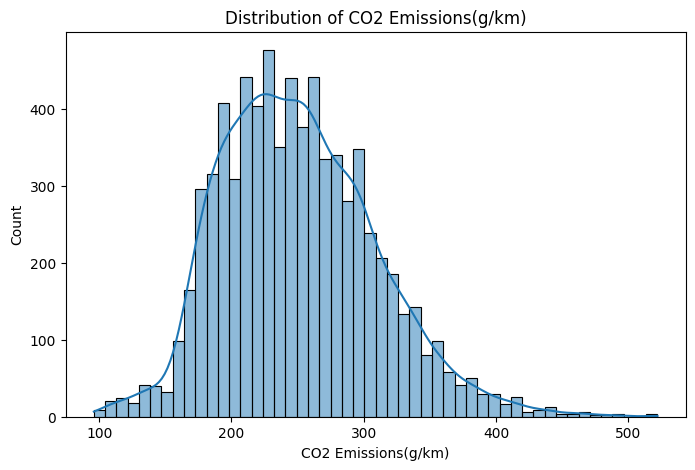

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data["CO2 Emissions(g/km)"], bins=50, kde=True)
plt.title("Distribution of CO2 Emissions(g/km)")
plt.xlabel("CO2 Emissions(g/km)")
plt.show()

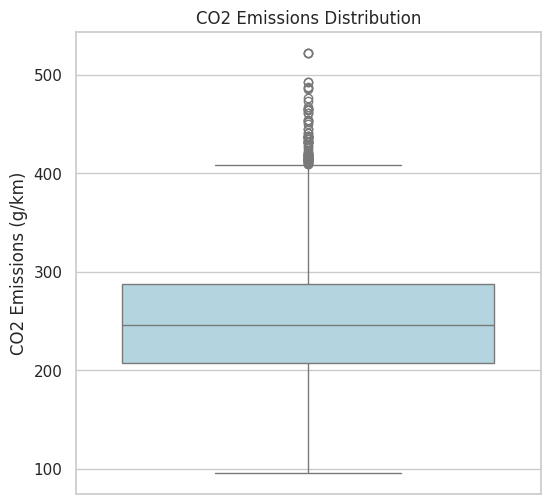

In [ ]:
# Set theme
sns.set_theme(style="whitegrid")
# Create figure
plt.figure(figsize=(6, 6))
# Boxplot for CO2 Emissions
sns.boxplot(y=data["CO2 Emissions(g/km)"], color="lightblue")
plt.title("CO2 Emissions Distribution")
plt.ylabel("CO2 Emissions (g/km)")

# Show plot
plt.show()


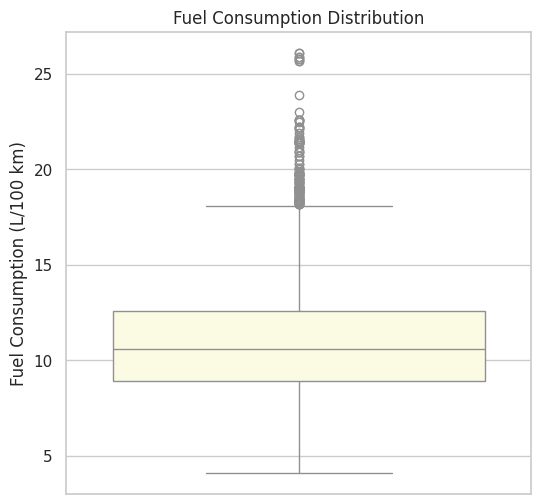

In [ ]:
# Create figure
plt.figure(figsize=(6, 6))

# Boxplot for Fuel Consumption
sns.boxplot(y=data["Fuel Consumption Comb (L/100 km)"], color="LightYellow")
plt.title("Fuel Consumption Distribution")
plt.ylabel("Fuel Consumption (L/100 km)")

# Show plot
plt.show()

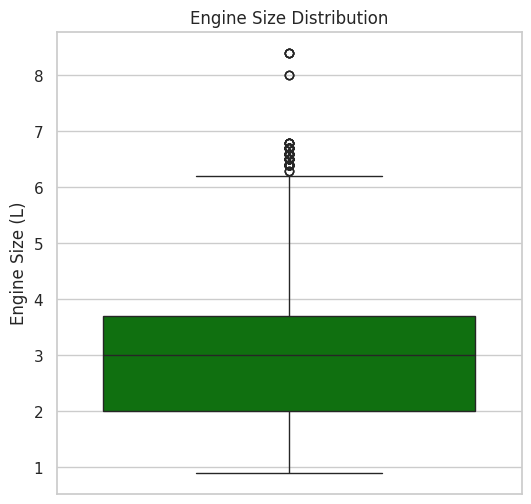

In [ ]:
# Set theme
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(6, 6))

# Boxplot for Engine Size
sns.boxplot(y=data["Engine Size(L)"], color="green")
plt.title("Engine Size Distribution")
plt.ylabel("Engine Size (L)")

# Show plot
plt.show()


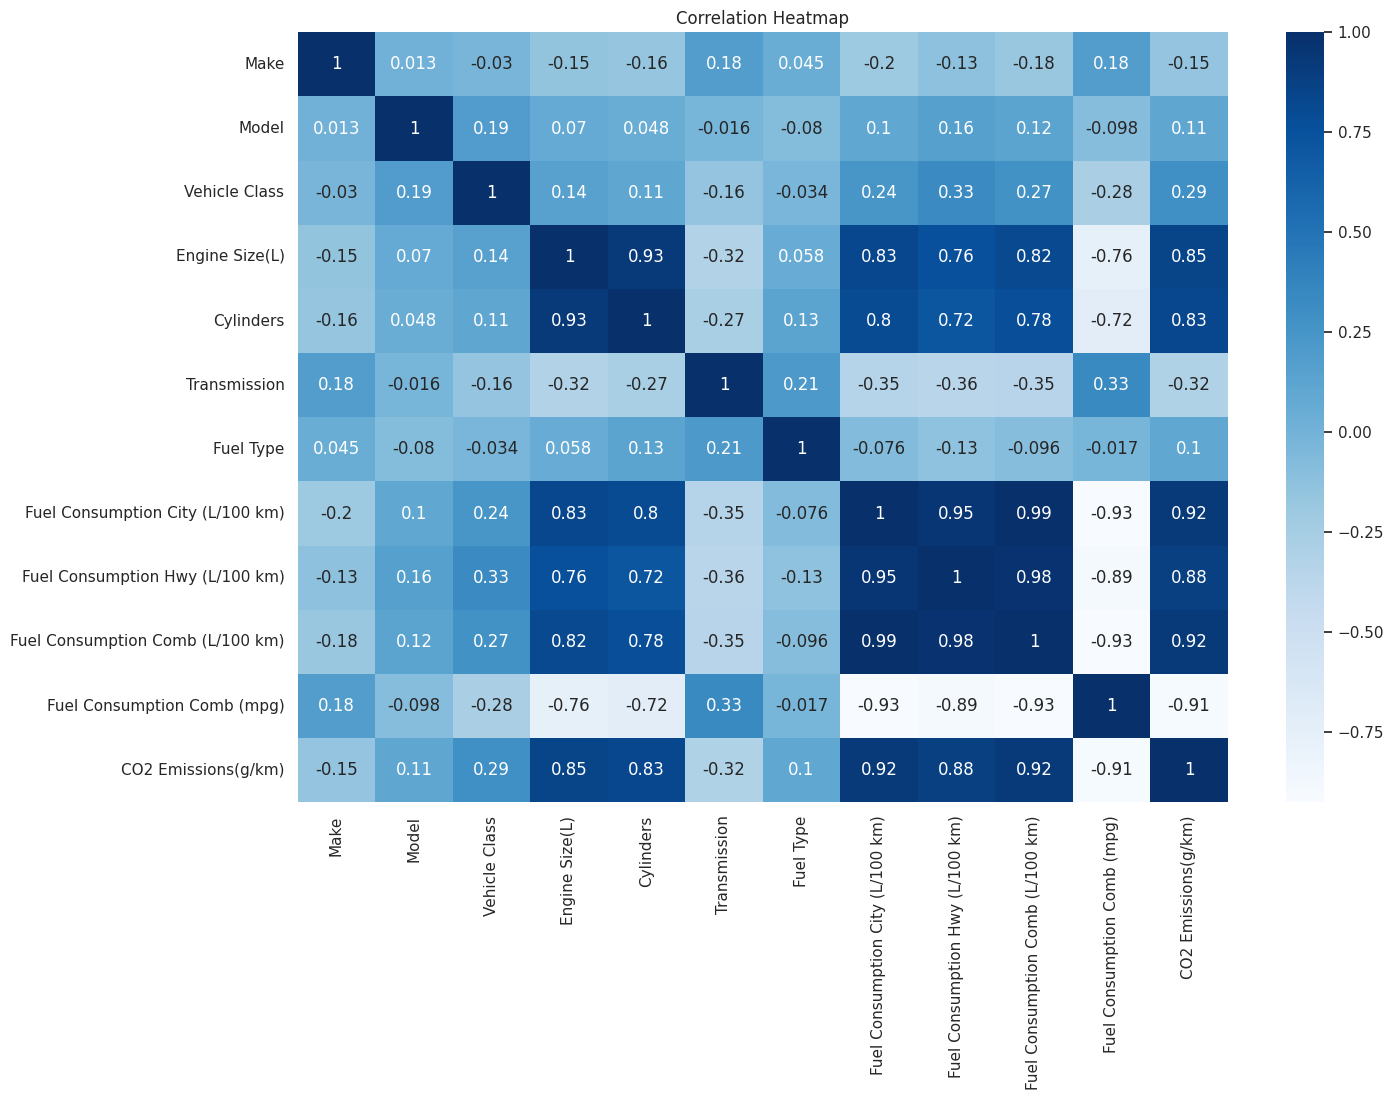

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# Build a Model from Scratch

In [ ]:
X = data.drop(columns=["CO2 Emissions(g/km)"])
y = data["CO2 Emissions(g/km)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.005, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
model = LinearRegressionScratch(learning_rate=0.002, epochs=10000)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance: MSE = {mse:.4f}, R² = {r2:.4f}")

Model Performance: MSE = 296.2157, R² = 0.9139


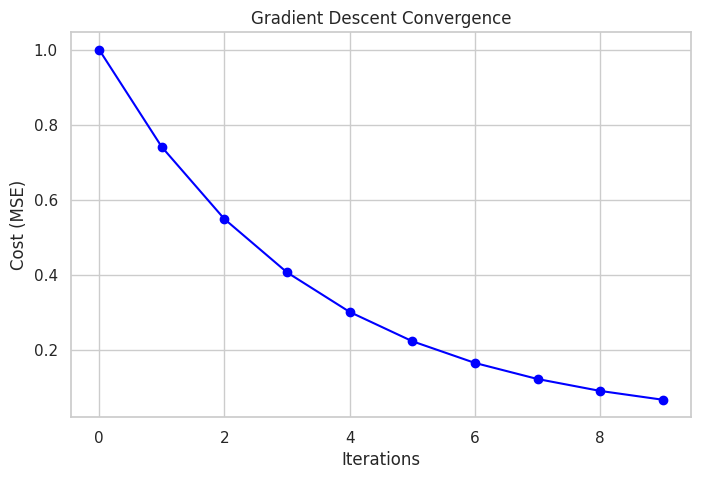

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
cost_history = []

# Simulate some cost values (replace this with actual training loop updates)
for i in range(10):  # Suppose we have 10 iterations
    cost = np.exp(-0.3 * i)  # Simulated decreasing cost (like gradient descent)
    cost_history.append(cost)

# Check the length of cost_history
num_iterations = len(cost_history)

# Plot the cost history
plt.figure(figsize=(8, 5))
plt.plot(range(num_iterations), cost_history, marker='o', linestyle='-', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.show()

#Build a Primary Model

In [ ]:
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)

y_pred_sklearn = sklearn_lr.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Scikit-Learn Linear Regression - MSE: {mse_sklearn:.4f}, R²: {r2_sklearn:.4f}")

Scikit-Learn Linear Regression - MSE: 295.3047, R²: 0.9141


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")

Random Forest Performance:
Mean Squared Error: 7.7440
R-squared Score: 0.9977
Mean Absolute Error: 1.7908


#Hyperparameter Tuning

#Hyperparameter Tuning for Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
print("Best Ridge Regression Hyperparameters:", ridge_grid.best_params_)

y_pred_ridge = best_ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression Performance: R² = {ridge_r2:.4f}, MSE = {ridge_mse:.4f}")


Best Ridge Regression Hyperparameters: {'alpha': 10}
Ridge Regression Performance: R² = 0.9141, MSE = 295.4160


#Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                               param_distributions=rf_params,
                               n_iter=5,
                               cv=3, scoring="r2",
                               n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("Best Random Forest Hyperparameters:", rf_search.best_params_)

y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Performance: R² = {rf_r2:.4f}, MSE = {rf_mse:.4f}")

Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Random Forest Performance: R² = 0.9977, MSE = 7.7897


# Feature Selection

In [ ]:
sfm_rf = SelectFromModel(rf, threshold="median")
sfm_rf.fit(X_train, y_train)

selected_features_rf = sfm_rf.get_support()
selected_columns_rf = X.columns[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_columns_rf)

Selected features using Random Forest:
Index(['Engine Size(L)', 'Cylinders', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')


In [ ]:
from sklearn.linear_model import Lasso

sfm_lasso = SelectFromModel(Lasso(alpha=0.01), threshold="median")

sfm_lasso.fit(X_train, y_train)

selected_features_lasso = sfm_lasso.get_support()
selected_columns_lasso = X.columns[selected_features_lasso]

print("Selected Features using Lasso Regression:")
print(selected_columns_lasso)


Selected Features using Lasso Regression:
Index(['Engine Size(L)', 'Cylinders', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')


# Final Model

In [ ]:
X_train_rf_selected = sfm_rf.transform(X_train)
X_test_rf_selected = sfm_rf.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_selected, y_train)

y_pred_rf = rf_model.predict(X_test_rf_selected)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"RandomForest-Selected Features Performance: R² = {rf_r2:.4f}, MSE = {rf_mse:.4f}")

RandomForest-Selected Features Performance: R² = 0.9976, MSE = 8.1927


In [ ]:
X_train_lasso_selected = sfm_lasso.transform(X_train)
X_test_lasso_selected = sfm_lasso.transform(X_test)

rf_model_lasso = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lasso.fit(X_train_lasso_selected, y_train)

y_pred_lasso = rf_model_lasso.predict(X_test_lasso_selected)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso-Selected Features Performance: R² = {lasso_r2:.4f}, MSE = {lasso_mse:.4f}")

Lasso-Selected Features Performance: R² = 0.9977, MSE = 7.8094


#Conclusion

1.Model Performance:
The regression models implemented in this study, including Linear Regression, Ridge Regression, and Random Forest, demonstrated varying levels of accuracy in predicting CO2 emissions. The baseline Linear Regression model achieved an MSE of 296.2152 and an R^2 score of 0.9139,while the Scikit-Learn implementation slightly improved performed with an MSE of 295.3042 and R^2 of 0.9141.Random Forest significantly outperformed Linear Regression, achieving an MSE of 7.7532 and an R² score of 0.9977, indicating its superior ability to capture complex feature relationships and non-linearity. Additional feature selection using Lasso Regression resulted in a Random Forest model with an MSE of 7.8094 and R² of 0.9977, showing minimal performance trade-off with reduced features.

2.Impact of Methods:

  a. Feature Selection: Recursive Feature Elimination (RFE) and SelectFromModel were applied to remove irrelevant or redundant features, improving model interpretability and, in some cases, accuracy. The Lasso-selected features model retained high performance, demonstrating the effectiveness of feature selection in reducing model complexity without significant accuracy loss.
   
   b. Hyperparameter Tuning: GridSearchCV was used to optimize hyperparameters for Ridge Regression and Random Forest. The best Ridge Regression model achieved an R² score of 0.9141 and an MSE of 295.4160, while the best Random Forest model, with optimized hyperparameters, reached an R² of 0.9977 and MSE of 7.7897, confirming the importance of fine-tuning for model performance.

   c. Cross-Validation: While cross-validation was used in hyperparameter tuning (via GridSearchCV), implementing k-fold cross-validation for all models in future iterations would provide a more generalized performance estimate and help mitigate overfitting.

3.Insights and Future Directions:
This analysis highlights the effectiveness of Random Forest in capturing complex relationships in CO₂ emissions data. Future improvements could include testing additional models such as Gradient Boosting or Neural Networks to further enhance predictive accuracy. Applying advanced hyperparameter tuning techniques, such as Bayesian Optimization, may further refine model performance. Additionally, incorporating domain-specific insights, such as fuel efficiency standards or additional environmental factors, could improve the model's interpretability and practical application. Finally, balancing the dataset, if necessary, and exploring model explainability techniques would support better decision-making in real-world scenarios.
  